In [2]:
import numpy as np
from scipy.io import loadmat
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
hf = h5py.File('/media/maria/DATA1/Documents/ZebraFish/subject_1/TimeSeries.h5', 'r')
#print(hf['absIx'])
neural_dat=np.array(hf['CellResp'])
del hf

regressors=loadmat('/media/maria/DATA1/Documents/ZebraFish/subject_1/data_full.mat')
cell_pos=regressors['data']['CellXYZ'][0][0]
missing_values=regressors['data']['IX_inval_anat'][0][0]
cell_pos=np.delete(cell_pos,missing_values,axis=0)

behavior=regressors['data']['Behavior_full'][0][0]

# Behavior PC's

In [8]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3)
pcs=pca.fit_transform(behavior.T)
print(pcs.shape)

(2880, 3)


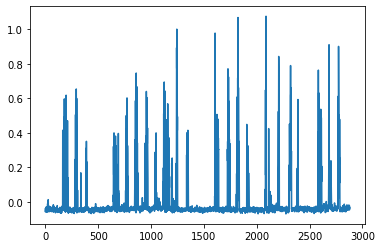

In [9]:
plt.plot(pcs[:,0])

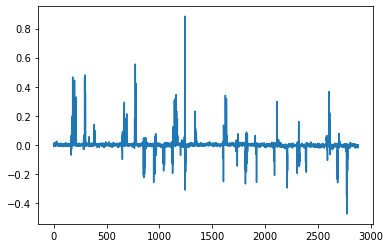

In [10]:
plt.plot(pcs[:,1])

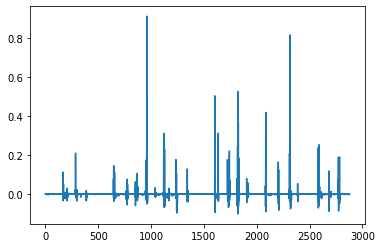

In [12]:
plt.plot(pcs[:,2])

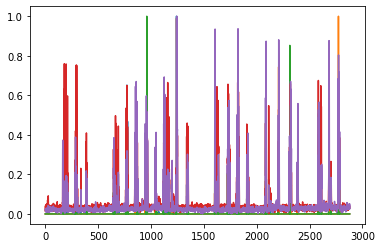

In [7]:
for j in range(0,5):
    plt.plot(behavior[j,:])

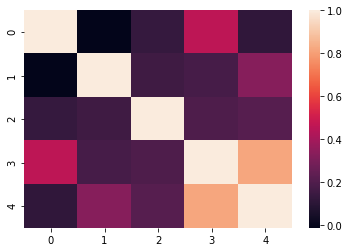

In [13]:
import seaborn as sns

sns.heatmap(np.corrcoef(behavior))

# Behavior Correlation

In [18]:
import time

def compute_beh_corr(pc):
    start=time.time()
    corr_arr=[]   
    for t in range(0,2800,100):
        print(t)
        corr_lst=[]
        for j in range(0,83205):
            corr_lst.append(np.corrcoef(pc[t:(t+100)],neural_dat[t:(t+100),j])[0,1])
        corr_arr.append(corr_lst)
    end=time.time()
    print('Time: ', end-start)
    corr_arr=np.array(corr_arr)
    np.save('/media/maria/DATA1/Documents/ZebraFish/plots/beh_corr_arrays/beh.npy',corr_arr)
    
compute_beh_corr(pcs[:,0])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
Time:  255.14668989181519


In [22]:
corr_arr=np.load('/media/maria/DATA1/Documents/ZebraFish/plots/beh_corr_arrays/beh.npy')

/home/maria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


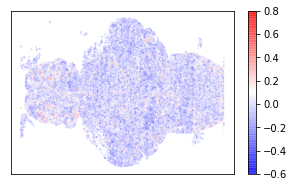

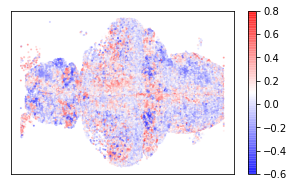

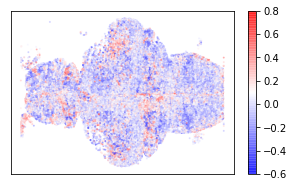

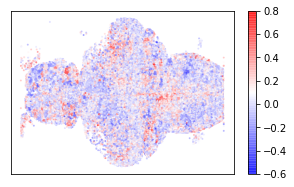

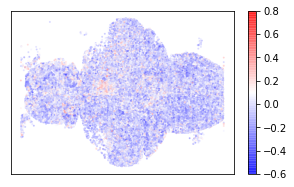

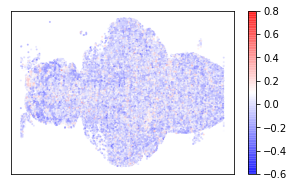

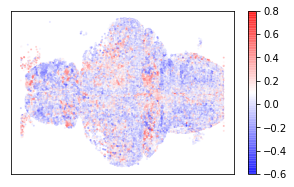

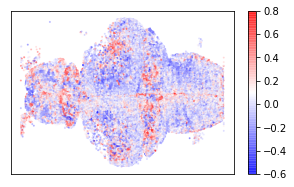

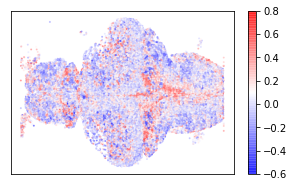

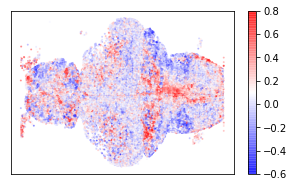

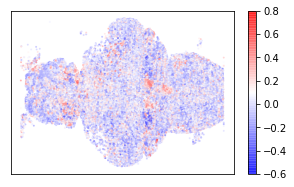

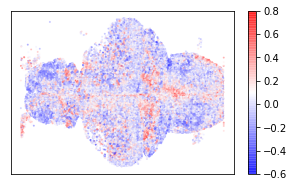

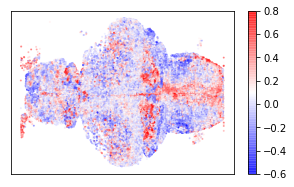

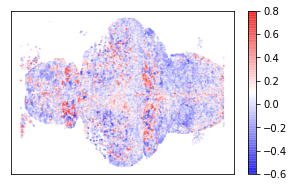

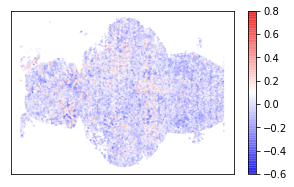

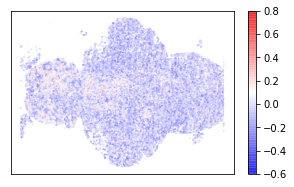

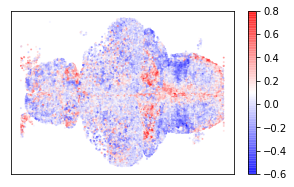

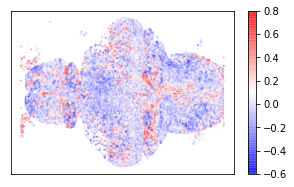

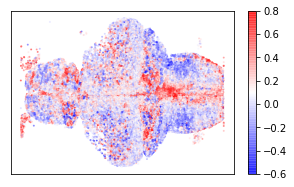

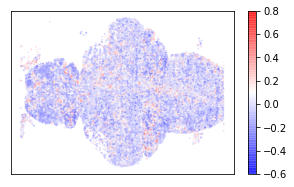

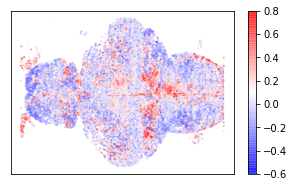

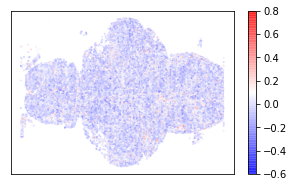

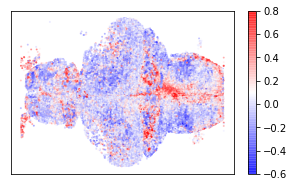

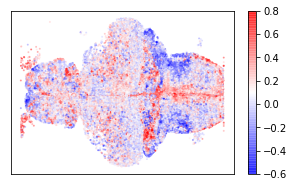

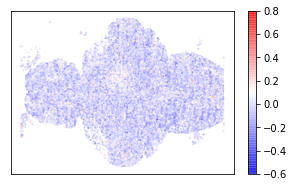

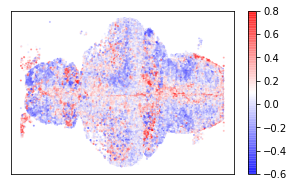

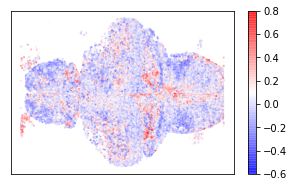

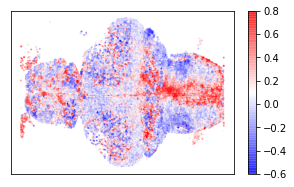

In [24]:
def make_image_files_beh(corr_arr):
    for j in range(0,28):
        fig = plt.figure(figsize=(5,3))
        plt.scatter(cell_pos[:,0], cell_pos[:,1], s = 1, c = corr_arr[j], cmap='bwr', alpha = .5, vmax=0.8, vmin=-0.6)
        plt.colorbar()
        #plt.show()
        plt.xticks([])
        plt.yticks([])
        plt.savefig('/media/maria/DATA1/Documents/ZebraFish/plots/beh_plots/plot_'+str(j)+'.png')
make_image_files_beh(corr_arr)

In [25]:
import imageio
images = []
filenames=['/media/maria/DATA1/Documents/ZebraFish/plots/beh_plots/plot_'+str(j)+'.png' for j in range(0,28)]
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('/media/maria/DATA1/Documents/ZebraFish/plots/beh_plots/beh_plots.gif', images,fps=3)